<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Ejercicio_26_reemplazo_de_herramientas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nombre: Solis Procopio Uriel**


**Ejercicio 26:** Una empresa dispone de varias maquinas herramienta cuya herramienta de corte se desgastan cosntantemente. Cuando esto ocurre, la máquina es inservible. En la actualidad el mantenimiento es correvtivo reemplazandose una herramienta cuando falla. Dado que cada máquina dispone de una torre de cinco herramientas, se propone reemplzar toda la torre de herramientas(las cinco herramientas de golpe) cada vez que falle una, lo que deberia reducir la frecuencia de desgaste de las herramientas. El tiempo necesaario para el reemplazo de una herramienta es de una hora. La cinco pueden reemplzarse en dos horas. El costo de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros. La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

  |Horas entre averías si sustituye una herramienta| 20 | 30 | 40 | 50 | 60 | 70 | 80 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|
  |Intervalo| 0 a 0.04|0.05 a 0.19 | 0.20 a 0.34 | 0.35 a 0.54| 0.55 a 0.74| 0.75 a 0.89| 0.90 a 1|

  Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente

  |Horas entre averías si sustituye una herramienta| 30 | 40 | 50 | 60 | 70 | 80 | 90 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|
  |Intervalo| 0 a 0.04|0.05 a 0.19 | 0.20 a 0.34 | 0.35 a 0.54| 0.55 a 0.74| 0.75 a 0.89| 0.90 a 1|

  (a) Determine mediante simulación la mejor politica de reemplazo de las herramientas de corte


#**Simulación de la primera tabla**: cuando solo se remplaza una pieza


**Paso 1:**  Definir variables

  x = costo final de todas las averías 

**Paso 2:** Distribución de probabilidad de cada variable

  |Horas entre averías si sustituye una herramienta| 20 | 30 | 40 | 50 | 60 | 70 | 80 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|

**Paso 3:**  Enumere la distribución acumulada de probabilidades de cada variable

  |Horas entre averías si sustituye una herramienta| 20 | 30 | 40 | 50 | 60 | 70 | 80 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|

**Paso 4:** Establezca el intervalo de números aleatorios correspondientes a cada valor de cada una de las variables

  |Horas entre averías si sustituye una herramienta| 20 | 30 | 40 | 50 | 60 | 70 | 80 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|
  |Intervalo| 0 a 0.04|0.05 a 0.19 | 0.20 a 0.34 | 0.35 a 0.54| 0.55 a 0.74| 0.75 a 0.89| 0.90 a 1|

**Paso 5:**  Generar números aleatorios

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Datos de entrada
horas_averia = [20, 30, 40, 50, 60, 70, 80]
probabilidad = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10]
costo_pieza = 10 #costo en euros de cada pieza
costo_parada = 100 #costo en euros de que este parada durante una hora
cambio_individual = 1  # Horas para cambiar una sola pieza
cambio_lote = 2  # Horas para cambiar todo el lote de 5 piezas

In [3]:
# Función para determinar el tiempo entre averías
def tiempo_entre_averias(horas_averia, probabilidad):
    r = random.uniform(0,1) # Se genera un número aleatorio entre 0 y 1
    f_x = 0 # Se inicia la variable f_x en 0
    # Se itera a través de los intervalos de horas de avería
    for i in range(len(horas_averia)):  
        f_x += probabilidad[i] # Se acumula la probabilidad  al intervalo actual
        if r <= f_x: # Si el número aleatorio generado es menor o igual a la probabilidad acumulada 
          return horas_averia[i] # se devuelve el valor correspondiente al intervalo actual

**Paso 6:** Simulamos una corrida

In [4]:
# Simulación de una hora de operación de la máquina
def operacion_maquina(cambio_individual, cambio_lote, costo_pieza, costo_parada):
    tiempo = tiempo_entre_averias(horas_averia, probabilidad) # Determinar el tiempo entre averías
    costo_individual = costo_pieza + costo_parada/cambio_individual   # Calcular costo de una avería y cambio individual de pieza
    costo_lote = 5*costo_pieza + costo_parada/cambio_lote # Calcular costo de cinco averías y cambio de lote completo de piezas

    # Calcular costo total a pagar por hora de máquina parada
    if tiempo < cambio_lote:
        costo_total = costo_lote
    else:
        costo_total = costo_individual*(tiempo//cambio_individual) + costo_lote*(tiempo//cambio_lote)
        if tiempo % cambio_individual != 0:
            costo_total += costo_individual
    return costo_total

In [21]:
operacion_maquina(1,2,10,100) #Consideramos los parametros que nos da el ejercicio

6400.0

In [22]:
#simulamos n veces nuestro experimento
def simulacion(n):
    L=[]  # Lista vacía que contendrá los resultados de cada simulación
    costo_final = 0  # Inicializar el costo final en 0
    for i in range(n):
        costo_final += operacion_maquina(1,2,10,100) # Realizar una operación de la máquina y sumar el costo
        L.append(costo_final/(i+1)) # Calcular el costo promedio y agregarlo a la lista L
    return L  #Devolver la lista de resultados

In [23]:
X = simulacion(600) #hacemos 1000 veces la simuación

**Paso 7:** Obtenga la gráfica de la estabilización que indica que el tamaño de muestra utilizado es suficiente para generalizar la convergencia del resultado.

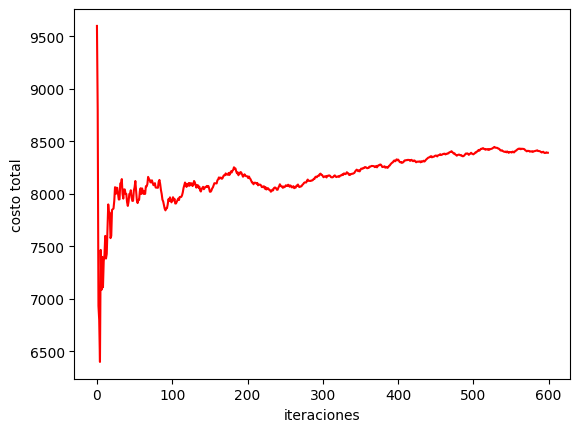

In [24]:
plt.plot(X, color = "red") #Gráficar
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('costo total') #Etiqueta del eje de las y
plt.show() #Mostrar la gráfica

In [25]:
np.mean(X) #calculamos la media del costo final

8183.236474094462

**Paso 8:** Replique el modelo

In [26]:
#Repetimos el modelo n veces
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(600) # Realizamos la para calcual el costo 600 veces
        lista.append(np.mean(s)) # Agregamos la media de los beneficios obtenidos en la lista
    return lista

In [31]:
Y=modelo(200) # Asignamos valores a n 

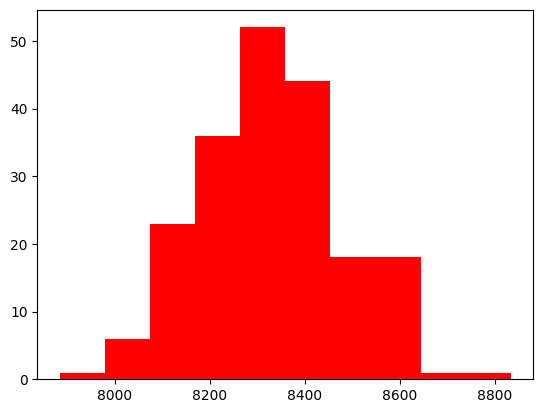

In [32]:
plt.hist(Y, color = "red") #Gráficamos un histograma 
plt.show()#mostramos la gráfica

**Paso 9:** Calculamos la media y la desviación estandar

In [33]:
print(np.mean(Y), np.std(Y)) #imprimimos la media y la desviación estandar

8327.020659192236 151.17432590075717


**Paso 10:** Hallamos el intervalo de confianza

In [34]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) #Calculamos el intervalo de confinza

(8285.117273925829, 8368.924044458643)

#**Simulación de la segunda tabla:**cuando se reemplazan todas las piezas

**Paso 1:** Definir variables

x = costo final de todas las averías

**Paso 2:** Distribución de probabilidad de cada variable

  |Horas entre averías si sustituye una herramienta| 30 | 40 | 50 | 60 | 70 | 80 | 90 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|

**Paso 3:**  Enumere la distribución acumulada de probabilidades de cada variable

  |Horas entre averías si sustituye una herramienta| 30 | 40 | 50 | 60 | 70 | 80 | 90 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|

**Paso 4:** Establezca el intervalo de números aleatorios correspondientes a cada valor de cada una de las variables

  |Horas entre averías si sustituye una herramienta| 30 | 40 | 50 | 60 | 70 | 80 | 90 |
  |---|---|---|---|---|---|---|---|
  |Probabilidad|0.05 |0.15 | 0.15| 0.20 | 0.20 | 0.15 | 0.10|
  |F(x)|0.05|0.20|0.35|0.55|0.75|0.90|1.0|
  |Intervalo| 0 a 0.04|0.05 a 0.19 | 0.20 a 0.34 | 0.35 a 0.54| 0.55 a 0.74| 0.75 a 0.89| 0.90 a 1|

**Paso 5:**  Generar números aleatorios

In [35]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [36]:
# Datos de entrada
horas_averia = [30, 40, 50, 60, 70, 80, 90]
probabilidad = [0.10, 0.10, 0.20, 0.20, 0.20, 0.15, 0.05]
costo_pieza = 10 #costo en euros de cada pieza
costo_parada = 100 #costo en euros de que este parada durante una hora
cambio_lote = 2  # Horas para cambiar todo el lote de 5 piezas

In [37]:
# Función para determinar el tiempo entre averías
def tiempo_entre_averias(horas_averia, probabilidad):
    r = random.uniform(0,1) #se genera un número aleatorio entre 0 y 1 
    f_x = 0 #se inicia la variable f_x en 0
    #se itera a través de los intervalos de horas de avería 
    for i in range(len(horas_averia)): 
        f_x += probabilidad[i] #se acumula la probabilidad al intervalo actual
        if r <= f_x: #Si el numero aleatorio generado es menor o igual a la probabilidad acumulada
            return horas_averia[i] #se devuelve el valor cprrespondiente al intervalo actual

**Paso 6:** Simulamos una corrida

In [39]:
#Simulación de una hora de operación de la maquina
def operacion_maquina(cambio_lote, costo_pieza, costo_parada):
    tiempo = tiempo_entre_averias(horas_averia, probabilidad)  # Determinar el tiempo entre averías
    costo_lote = 5*costo_pieza + costo_parada/cambio_lote # Calcular costo de cinco averías y cambio de lote completo de piezas
    
    # Calcular costo total a pagar por hora de máquina parada
    if tiempo < cambio_lote:
        costo_total = costo_lote
    else:
        costo_total = costo_lote*(tiempo//cambio_lote)
        if tiempo % cambio_lote != 0:
            costo_total += costo_lote
    return costo_total

In [40]:
operacion_maquina(2,10,100) #Consideramos los parametros que nos da el ejercicio

3500.0

In [41]:
#simulamos n veces nuestro experimento
def simulacion(n):
    L=[]  # Lista vacía que contendrá los resultados de cada simulación
    costo_final = 0  # Inicializar el costo final en 0
    for i in range(n):
        costo_final += operacion_maquina(2,10,100) # Realizar una operación de la máquina y sumar el costo
        L.append(costo_final/(i+1)) # Calcular el costo promedio y agregarlo a la lista L
    return L  #Devolver la lista de resultados

In [53]:
X = simulacion(600) #hacemos 1000 veces la simuación

**Paso 7:** Obtenga la gráfica de la estabilización que indica que el tamaño de muestra utilizado es suficiente para generalizar la convergencia del resultado.

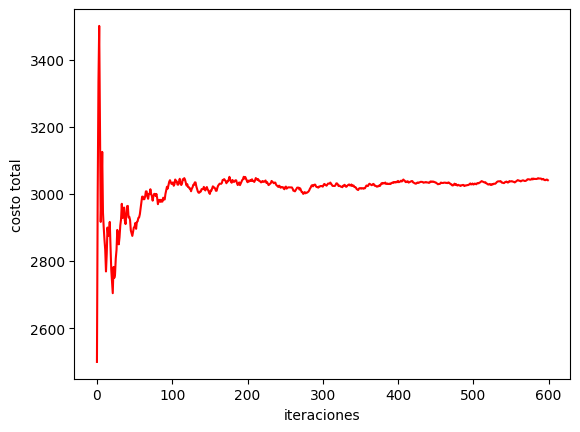

In [54]:
plt.plot(X, color = "red") #Gráficar
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('costo total') #Etiqueta del eje de las y
plt.show() #Mostrar la gráfica

In [55]:
np.mean(X) #calculamos la media del costo final

3015.455530210298

**Paso 8:** Replique el modelo

In [56]:
#Repetimos el modelo n veces
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(600) # Realizamos la para calcual el costo 600 veces
        lista.append(np.mean(s)) # Agregamos la media de los beneficios obtenidos en la lista
    return lista

In [57]:
Y=modelo(200) # Asignamos valores a n 

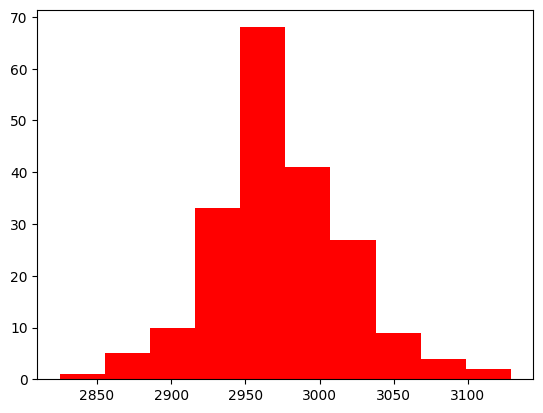

In [58]:
plt.hist(Y, color = "red") #Gráficamos un histograma 
plt.show()#mostramos la gráfica

**Paso 9:** Calculamos la media y la desviación estandar

In [59]:
print(np.mean(Y), np.std(Y)) #imprimimos la media y la desviación estandar

2973.20421649598 46.04624525646799


**Paso 10:** Calculamos el intervalo de confianza

In [60]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(2960.440848486521, 2985.9675845054385)

#**Concusión**

Considerando los mismo parametros para las dos simulaciones tendremos que el costo media para cuando se **reemplaza una sola pieza** es de **8143 €** mientras para cuado **reemplazamos todas las piezas** es de **3015 €**

Entonces podemos concluir que es mucho mejor la politica de remplazar todas la piezas en un solo lote aún cuando se haya averiado una sola pieza.